In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import time 
import matplotlib.font_manager as font_manager

In [16]:
data0 = pd.read_csv('predict0.csv',index_col=0)
data1 = pd.read_csv('predict1.csv',index_col=0)
data2 = pd.read_csv('predict2.csv',index_col=0)

In [17]:
data0.predict.tolist()==data1.predict.tolist()

True

In [18]:
data0.head(10)

,date,open,high,low,close,volume,money,open_interest,close_shift(-5),return,label,predict
0,2021-07-19 09:25:00,2715.0,2718.0,2713.0,2714.0,21.0,0.0,3692.0,2710.0,-4.0,-1,0
1,2021-07-19 09:30:00,2714.0,2715.0,2712.0,2714.0,6.0,0.0,3692.0,2700.0,-14.0,-1,-1
2,2021-07-19 09:35:00,2714.0,2714.0,2712.0,2712.0,25.0,0.0,3708.0,2693.0,-19.0,-1,1
3,2021-07-19 09:40:00,2712.0,2712.0,2712.0,2712.0,0.0,0.0,3708.0,2690.0,-22.0,-1,0
4,2021-07-19 09:45:00,2712.0,2712.0,2712.0,2712.0,24.0,0.0,3719.0,2693.0,-19.0,-1,1
5,2021-07-19 09:50:00,2712.0,2712.0,2710.0,2710.0,7.0,0.0,3712.0,2690.0,-20.0,-1,0
6,2021-07-19 09:55:00,2710.0,2710.0,2698.0,2700.0,24.0,0.0,3734.0,2700.0,0.0,0,1
7,2021-07-19 10:00:00,2700.0,2700.0,2693.0,2693.0,4.0,0.0,3734.0,2693.0,0.0,0,1
8,2021-07-19 10:05:00,2693.0,2700.0,2688.0,2690.0,16.0,0.0,3738.0,2697.0,7.0,1,1
9,2021-07-19 10:10:00,2690.0,2693.0,2690.0,2693.0,10.0,0.0,3742.0,2694.0,1.0,0,1



1.此数据时间为右标注时间   
2.label 是5 K 之后的收益比较   
3.predict 是对5 K 之后的收益预测   
4.预测为1，在下一根开始的时候买,以此根K的收盘价为计算     
5.预测为-1，在下一根开始的时候卖，以此根K的收盘价为计算     
6.持仓周期为5，预测值下一根开盘的时候买，第5根结束之后第6根开盘的时候卖

In [19]:
pd.set_option('max_columns',1000) 
pd.set_option('max_row',1000)
sum = 5000
data = data0.copy()
# data['pos1'] = 0
# data['pos2'] = 0
for i in data.index:
    if i+5>=len(data):
        break
    if data.loc[i,'predict'] == -1:
        data.loc[i+5,'pos1'] = -(data.loc[i+5,'close']-data.loc[i,'close'])
    elif data.loc[i,'predict'] == 1:
        data.loc[i+5,'pos2'] = data.loc[i+5,'close']-data.loc[i,'close']
    if i>1:
        data.loc[i,'pos'] = data.loc[:i,'pos1'].sum()+data.loc[:i,'pos2'].sum()
data.head(100)

,date,open,high,low,close,volume,money,open_interest,close_shift(-5),return,label,predict,pos1,pos2,pos
0,2021-07-19 09:25:00,2715.0,2718.0,2713.0,2714.0,21.0,0.0,3692.0,2710.0,-4.0,-1,0,NaN,NaN,NaN
1,2021-07-19 09:30:00,2714.0,2715.0,2712.0,2714.0,6.0,0.0,3692.0,2700.0,-14.0,-1,-1,NaN,NaN,NaN
2,2021-07-19 09:35:00,2714.0,2714.0,2712.0,2712.0,25.0,0.0,3708.0,2693.0,-19.0,-1,1,NaN,NaN,0.0
3,2021-07-19 09:40:00,2712.0,2712.0,2712.0,2712.0,0.0,0.0,3708.0,2690.0,-22.0,-1,0,NaN,NaN,0.0
4,2021-07-19 09:45:00,2712.0,2712.0,2712.0,2712.0,24.0,0.0,3719.0,2693.0,-19.0,-1,1,NaN,NaN,0.0
5,2021-07-19 09:50:00,2712.0,2712.0,2710.0,2710.0,7.0,0.0,3712.0,2690.0,-20.0,-1,0,NaN,NaN,0.0
6,2021-07-19 09:55:00,2710.0,2710.0,2698.0,2700.0,24.0,0.0,3734.0,2700.0,0.0,0,1,14.0,NaN,14.0
7,2021-07-19 10:00:00,2700.0,2700.0,2693.0,2693.0,4.0,0.0,3734.0,2693.0,0.0,0,1,NaN,-19.0,-5.0
8,2021-07-19 10:05:00,2693.0,2700.0,2688.0,2690.0,16.0,0.0,3738.0,2697.0,7.0,1,1,NaN,NaN,-5.0
9,2021-07-19 10:10:00,2690.0,2693.0,2690.0,2693.0,10.0,0.0,3742.0,2694.0,1.0,0,1,NaN,-19.0,-24.0


In [20]:
data.tail(100)

,date,open,high,low,close,volume,money,open_interest,close_shift(-5),return,label,predict,pos1,pos2,pos
8563,2022-01-20 10:15:00,2792.0,2805.0,2792.0,2805.0,22411.0,0.0,912081.0,2815.0,10.0,1,-1,17.0,NaN,17978.0
8564,2022-01-20 10:35:00,2805.0,2814.0,2802.0,2814.0,18748.0,0.0,912465.0,2816.0,2.0,0,1,NaN,2.0,17980.0
8565,2022-01-20 10:40:00,2814.0,2830.0,2814.0,2827.0,46144.0,0.0,920312.0,2815.0,-12.0,-1,0,NaN,29.0,18009.0
8566,2022-01-20 10:45:00,2827.0,2827.0,2813.0,2813.0,19693.0,0.0,920960.0,2806.0,-7.0,-1,1,NaN,17.0,18026.0
8567,2022-01-20 10:50:00,2813.0,2821.0,2811.0,2817.0,13714.0,0.0,922169.0,2808.0,-9.0,-1,0,NaN,25.0,18051.0
8568,2022-01-20 10:55:00,2817.0,2817.0,2811.0,2815.0,6775.0,0.0,923219.0,2806.0,-9.0,-1,-1,-10.0,NaN,18041.0
8569,2022-01-20 11:00:00,2815.0,2819.0,2813.0,2816.0,7116.0,0.0,924698.0,2805.0,-11.0,-1,-1,NaN,2.0,18043.0
8570,2022-01-20 11:05:00,2816.0,2823.0,2815.0,2815.0,10908.0,0.0,928289.0,2805.0,-10.0,-1,-1,NaN,NaN,18043.0
8571,2022-01-20 11:10:00,2815.0,2816.0,2803.0,2806.0,20059.0,0.0,932065.0,2812.0,6.0,1,-1,NaN,-7.0,18036.0
8572,2022-01-20 11:15:00,2806.0,2810.0,2804.0,2808.0,12000.0,0.0,936106.0,2806.0,-2.0,0,-1,NaN,NaN,18036.0


In [7]:
class Dyp():
    def __init__(self,data,n,label):
        self.n= n
        self.indx = 0
        self.data = data
        self.yarray = [np.nan]*self.n
        self.label = label
        
        

    def update(self,point): 
        if self.indx >= n:
            time.sleep(10)
        
        self.yarray[self.indx] = point

        #绘图
        self.line.set_ydata(self.yarray) 
        # time.sleep(np.random.rand()/10) 
        #颜色设置 
        plt.setp(self.line, 'color', 'r', 'linewidth', 2.0) 
        self.indx += 1
        return self.line   
    def dynamic_plot(self):
        # 截取数据
        close = self.data[self.label].tolist()[-self.n:]
        fig, ax = plt.subplots(figsize=(12,8)) 
        self.line, = ax.plot(self.yarray,label='动态曲线',color='red') 
        ax.legend(loc='upper center', ncol=4, prop=font_manager.FontProperties(size=10))

        ax.set_xlim([0, self.n])
        ax.set_ylim([min(close)-10, max(close)+10]) 
        
        ax.set_ylabel("distance: m") 
        ax.set_xlabel("time") 
        
        plt.grid(True) 

        
        ani = animation.FuncAnimation(fig, self.update,frames=close,interval=1,blit=False) #interval更新频率，以ms计
        plt.legend(loc='upper center', ncol=4, prop=font_manager.FontProperties(size=10))
        plt.show()
        # plt.pause(10)

In [8]:
n = len(data)
n

8663

E:\anaconda3\envs\ml_bt\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21160 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\anaconda3\envs\ml_bt\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\anaconda3\envs\ml_bt\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26354 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\anaconda3\envs\ml_bt\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 32447 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\anaconda3\envs\ml_bt\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 21160 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\anaconda3\envs\ml_bt\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 24577 missing from current f

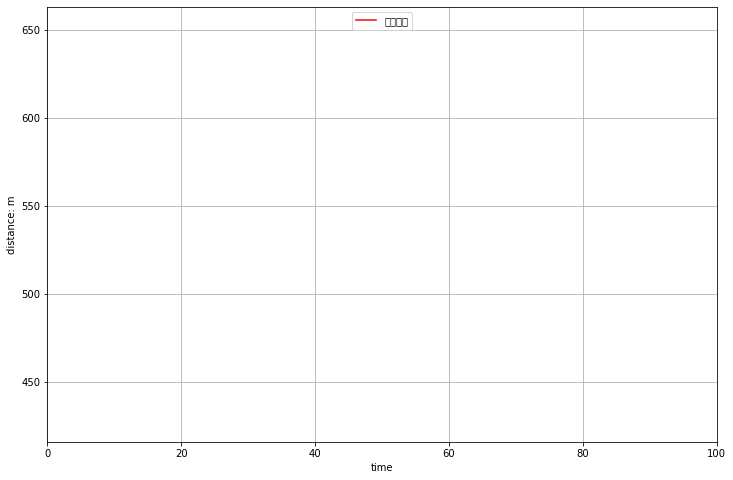

In [9]:
# print(n//100)
p = Dyp(data,100,'pos')
p.dynamic_plot()